In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.widgets import Slider

## ISING MODEL INTRODUCTION

#### Task 1: Creating initial grid 

First let's create the system of spins. We can do that by assigning each point on the two-dimensional grid with the number: 1 (spin up) or -1 (spin down). Creating an "empty" grid of size L = 10, can be done with following piece of code:

In [15]:
L = 50

grid = np.zeros((L, L))

Variable grid is now an array of zeros. Try to assign to each site of this array either +1 or -1, by using "for" loops:

In [16]:
for i in range(L):
    for j in range(L):
        grid[i, j] = 1 - 2 * np.random.randint(2)   
                                         # this is how you can access i-th row and j-th column of the grid. Try to call a function 
                                         # (on the right side of assignment) that will randomly return either -1 or 1.

Great! Let's check out if grid has now the +1 and -1 as its values:

In [17]:
print(grid)

[[-1.  1.  1. ...  1.  1. -1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [-1.  1. -1. ...  1. -1. -1.]
 [ 1.  1.  1. ...  1. -1. -1.]
 [ 1. -1.  1. ... -1. -1.  1.]]


#### Task 2: Writing the function that "flips" spins

For our algorithm to work, we need a way to flip single spins on a given position of the lattice. Let's write a function that will do that. It should take as an input the position of the spin. It should check what is a current value of the spin at that point and change it accordingly.

In [18]:
def flip_spin(i, j):
    if grid[i, j] == 1:
        grid[i, j] = -1
    else:
        grid[i, j] = 1

#### Task 3: Writing the function that calculates energy of the grid

We will also need a function that will calculate the energy of our grid configuration. This is important, as we will need to check the difference between energy of our grid before and after the spin flip.

In [19]:
J = -1

def calculate_energy():
    en = 0
    for i in range(L):
        for j in range(L):
            for k in range(4):
                en += J * grid[i, j] * (grid[(i+1)%L, j] + grid[i-1, j] + grid[i, (j+1)%L] + grid[i, j-1])
    return en          

#### Task 4: Writing the function that evolves our system

Last function will handle evolving our system, that is flipping spins randomly and accepting or rejecting new configuration according to change in energy.

<IPython.core.display.Javascript object>


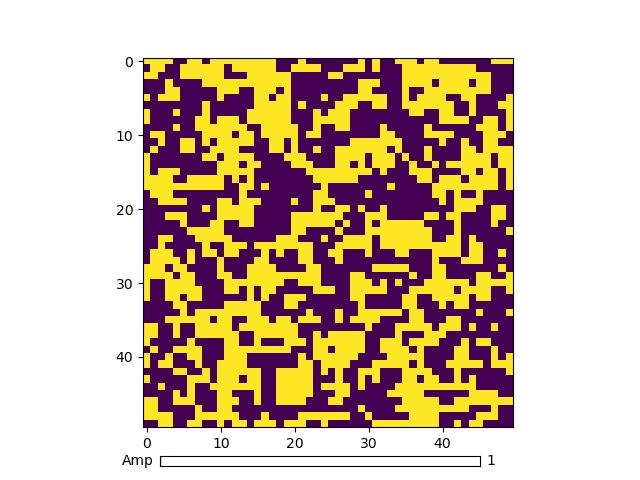

T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1
T = 1


KeyboardInterrupt: 

In [21]:
%matplotlib notebook
T = 1



from matplotlib.widgets import Slider

not_updated = 0

def update_system():
    global not_updated
    i = np.random.randint(L)
    j = np.random.randint(L)
    en_old = calculate_energy()
    flip_spin(i, j)
    en_new = calculate_energy()
    
    if np.exp(-(en_new - en_old) / T) < np.random.rand():
        flip_spin(i, j)
        not_updated += 1
        

def update_slider(val):
    global T
    T = val
    fig.canvas.draw_idle()
    print('slider changed')
    
        
no_updates = 100
        
fig = plt.figure()
plt.ion()
ax = fig.add_subplot(111)

initial_amp = T

axamp = plt.axes([0.25, .03, 0.50, 0.02])
samp = Slider(axamp, 'Amp', 0, 1000, valinit=initial_amp)

samp.on_changed(update_slider)

ax.imshow(grid)

fig.show()

for i in range(no_updates):
    for j in range(50):
        update_system()
    ax.imshow(grid)
    fig.canvas.draw()
    print('T = ' + str(T))
    
    
